In [2]:
from google.colab import files
files.upload()


Output hidden; open in https://colab.research.google.com to view.

In [1]:
!ls

sample_data


In [0]:
import numpy 
print(numpy.__version__)

1.14.6


In [0]:
import pandas 
print(pandas.__version__)

0.22.0


In [0]:
import matplotlib 
print(matplotlib.__version__)

2.1.2


In [0]:
import sklearn 
print(sklearn.__version__)

0.20.1


In [0]:
import nltk 
print(nltk.__version__)

3.2.5


In [0]:
# !pip install wordcloud
import wordcloud
print(wordcloud.__version__)

1.5.0


In [0]:
import tensorflow
print(tensorflow.__version__)

1.12.0


In [3]:
import pandas as pd
df = pd.read_csv('spam_emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [0]:
spam_email_df = df[df["spam"] == 1]
notspam_email_df = df[df["spam"] == 0]
print("共计{}条邮件，非垃圾邮件有{}封，垃圾邮件有{}封。".format(df.shape[0], len(notspam_email_df), len(spam_email_df)))

共计5728条邮件，非垃圾邮件有4360封，垃圾邮件有1368封。


In [0]:
import matplotlib.pyplot as plt
plt.style.use("default")

In [8]:
groupeddf = df.groupby(["spam"]).count()
groupeddf.head()

,text,length
spam,,
0,4360,4360
1,1368,1368


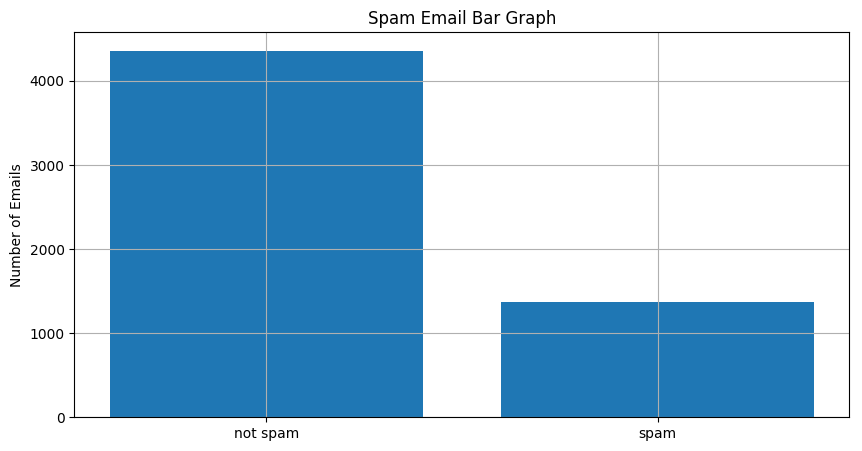

In [9]:
X = []
X.append("not spam" if groupeddf.index.values[0] == 0 else "")
X.append("spam" if groupeddf.index.values[1] == 1 else "")
# 或者
# X = ["not spam", "spam"]
y = groupeddf.values[:,0]
 
fig, ax = plt.subplots()  
fig.set_size_inches(10, 5) 
ax.bar(X, y) 
plt.title('Spam Email Bar Graph')  
plt.ylabel('Number of Emails') 
plt.grid() 
plt.show()

In [4]:
df["text"] = [text[len("Subject: "):] for text in df["text"]]
df['length'] = df['text'].map(lambda text: len(text))
df.head()

,text,spam,length
0,naturally irresistible your corporate identity...,1,1475
1,the stock trading gunslinger fanny is merrill...,1,589
2,unbelievable new homes made easy im wanting t...,1,439
3,4 color printing special request additional i...,1,491
4,"do not have money , get software cds from here...",1,226


In [0]:
df.isnull().sum()

text      0
spam      0
length    0
dtype: int64

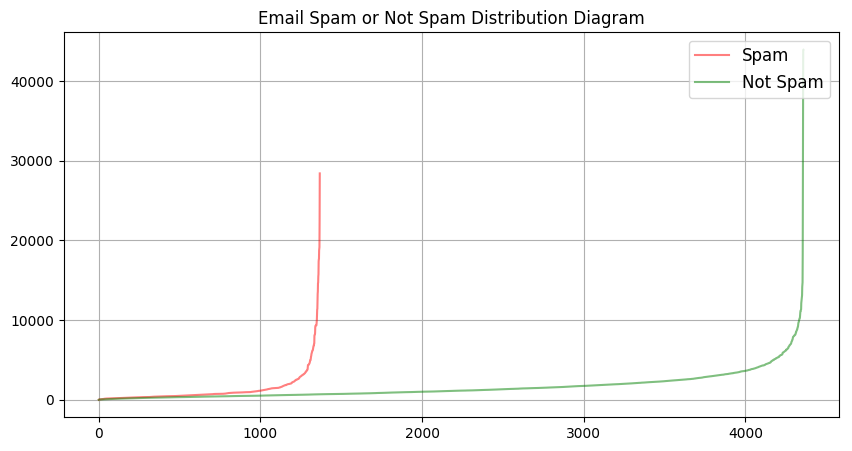

In [10]:
import numpy as np
spam_df = df[df["spam"] == 1]["length"].values
notspam_df = df[df["spam"] == 0]["length"].values

def plot_basic(spam_df, notspam_df):
    fig, ax = plt.subplots() 
    fig.set_size_inches(10, 5)
    ax.plot(
           np.array(range(spam_df.shape[0])), 
           np.sort(spam_df),
           color='r', 
           alpha=0.5, 
           label='Spam')
    ax.plot(
           np.array(range(notspam_df.shape[0])), 
           np.sort(notspam_df),
           color='g', 
           alpha=0.5, 
           label='Not Spam')
    plt.title('Email Spam or Not Spam Distribution Diagram') 
    plt.legend(loc=1, prop={'size': 12}) 
    plt.grid()
    plt.show()

plot_basic(spam_df, notspam_df)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
df['tokens'] = df['text'].map(lambda text: nltk.tokenize.word_tokenize(text))
print(df['tokens'][0])

['naturally', 'irresistible', 'your', 'corporate', 'identity', 'lt', 'is', 'really', 'hard', 'to', 'recollect', 'a', 'company', ':', 'the', 'market', 'is', 'full', 'of', 'suqgestions', 'and', 'the', 'information', 'isoverwhelminq', ';', 'but', 'a', 'good', 'catchy', 'logo', ',', 'stylish', 'statlonery', 'and', 'outstanding', 'website', 'will', 'make', 'the', 'task', 'much', 'easier', '.', 'we', 'do', 'not', 'promise', 'that', 'havinq', 'ordered', 'a', 'iogo', 'your', 'company', 'will', 'automaticaily', 'become', 'a', 'world', 'ieader', ':', 'it', 'isguite', 'ciear', 'that', 'without', 'good', 'products', ',', 'effective', 'business', 'organization', 'and', 'practicable', 'aim', 'it', 'will', 'be', 'hotat', 'nowadays', 'market', ';', 'but', 'we', 'do', 'promise', 'that', 'your', 'marketing', 'efforts', 'will', 'become', 'much', 'more', 'effective', '.', 'here', 'is', 'the', 'list', 'of', 'clear', 'benefits', ':', 'creativeness', ':', 'hand', '-', 'made', ',', 'original', 'logos', ',', '

In [13]:
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')
print("停用词共有{}个，前15个是：{}。".format(len(stop_words), stop_words[:15]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
停用词共有179个，前15个是：['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours']。


In [14]:
df['text_stopwords'] = df['tokens'].map(lambda tokens: " ".join([t for t in tokens if t not in stop_words])) 
print(df['text_stopwords'][0])

naturally irresistible corporate identity lt really hard recollect company : market full suqgestions information isoverwhelminq ; good catchy logo , stylish statlonery outstanding website make task much easier . promise havinq ordered iogo company automaticaily become world ieader : isguite ciear without good products , effective business organization practicable aim hotat nowadays market ; promise marketing efforts become much effective . list clear benefits : creativeness : hand - made , original logos , specially done reflect distinctive company image . convenience : logo stationery provided formats ; easy - - use content management system letsyou change website content even structure . promptness : see logo drafts within three business days . affordability : marketing break - ' make gaps budget . 100 % satisfaction guaranteed : provide unlimited amount changes extra fees surethat love result collaboration . look portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [15]:
import string
print("string.punctuation所包含的标点符号有：{}。".format(string.punctuation))

df['text_punctuation'] = df['text_stopwords'].map(lambda text: "".join([w for w in text if w not in string.punctuation]))
print(df['text_punctuation'][0])

string.punctuation所包含的标点符号有：!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~。
naturally irresistible corporate identity lt really hard recollect company  market full suqgestions information isoverwhelminq  good catchy logo  stylish statlonery outstanding website make task much easier  promise havinq ordered iogo company automaticaily become world ieader  isguite ciear without good products  effective business organization practicable aim hotat nowadays market  promise marketing efforts become much effective  list clear benefits  creativeness  hand  made  original logos  specially done reflect distinctive company image  convenience  logo stationery provided formats  easy   use content management system letsyou change website content even structure  promptness  see logo drafts within three business days  affordability  marketing break   make gaps budget  100  satisfaction guaranteed  provide unlimited amount changes extra fees surethat love result collaboration  look portfolio                           

In [16]:
nltk.download('wordnet')

lemmatizer = nltk.WordNetLemmatizer()
df['processed_text'] = df['text_punctuation'].map(lambda text: lemmatizer.lemmatize(text))
print(df['processed_text'][0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
naturally irresistible corporate identity lt really hard recollect company  market full suqgestions information isoverwhelminq  good catchy logo  stylish statlonery outstanding website make task much easier  promise havinq ordered iogo company automaticaily become world ieader  isguite ciear without good products  effective business organization practicable aim hotat nowadays market  promise marketing efforts become much effective  list clear benefits  creativeness  hand  made  original logos  specially done reflect distinctive company image  convenience  logo stationery provided formats  easy   use content management system letsyou change website content even structure  promptness  see logo drafts within three business days  affordability  marketing break   make gaps budget  100  satisfaction guaranteed  provide unlimited amount changes extra fees surethat love result collaborati

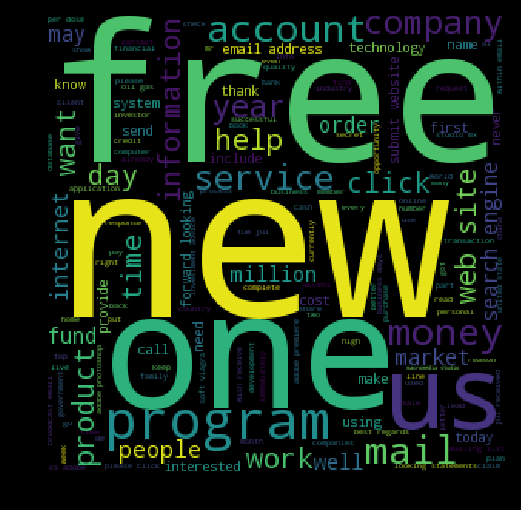

In [0]:
from wordcloud import WordCloud

def plot_wordcloud(email_text):
    email_wordcloud = WordCloud(width=300, height=300).generate(email_text)
    plt.figure(figsize=(8, 6), facecolor='k')
    plt.imshow(email_wordcloud)
    plt.show()
    
spam_words = ''.join(list(df[df['spam']==1]['processed_text']))
plot_wordcloud(spam_words)

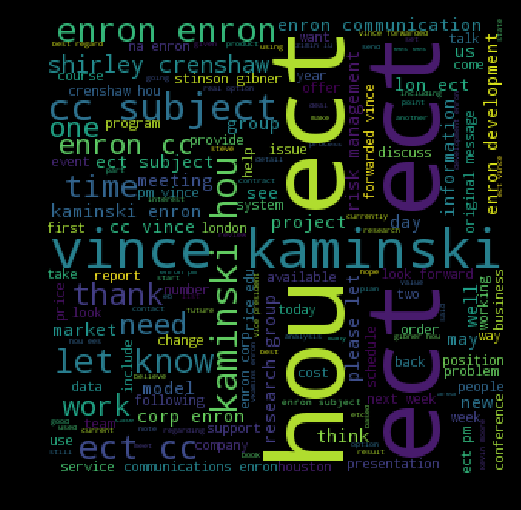

In [0]:
notspam_words = ''.join(list(df[df['spam']==0]['processed_text']))
plot_wordcloud(notspam_words)

In [47]:
from sklearn.model_selection import train_test_split

features = df["processed_text"] 
labels = df["spam"]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15)
print("X_train.shape={}, y_train.shape={}.".format(X_train.shape, y_train.shape))
print("X_test.shape={}, y_test.shape={}.".format(X_test.shape, y_test.shape))

X_train.shape=(4868,), y_train.shape=(4868,).
X_test.shape=(860,), y_test.shape=(860,).


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_train_text_counts = count_vectorizer.fit_transform(X_train.values)
X_test_text_counts = count_vectorizer.transform(X_test.values)

In [49]:
from sklearn.naive_bayes import MultinomialNB

classifierNB = MultinomialNB()
classifierNB.fit(X_train_text_counts, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
from sklearn.metrics import accuracy_score

predictions = classifierNB.predict(X_test_text_counts)
acc = accuracy_score(y_test, predictions)
print("测试精确度是：{:.7}%。".format(acc * 100))

测试精确度是：99.30233%。


In [51]:
a_good_mail_test_text = ["Zhang Qiang, it's important that our meeting will open at 3pm tommorrow."]
a_good_mail_test_text_counts = count_vectorizer.transform(a_good_mail_test_text)
prediction1 = classifierNB.predict(a_good_mail_test_text_counts)
print("测试结果等于{}表示这是一封正常邮件。".format(prediction1))

测试结果等于[0]表示这是一封正常邮件。


In [52]:
a_spam_mail_test_text = ["Due to her husband passed away, she's looking for somebody to inherit the legacy of $100 million."]
a_spam_mail_test_text_counts = count_vectorizer.transform(a_spam_mail_test_text)
prediction2 = classifierNB.predict(a_spam_mail_test_text_counts)
print("测试结果等于{}表示这是一封垃圾邮件。".format(prediction2))

测试结果等于[1]表示这是一封垃圾邮件。


In [0]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def ngram_vectorize(X_train, y_train, X_test):
    kwargs = {
            'ngram_range': (1, 2),  
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  
            'min_df': 2, 
    }
    vectorizer = TfidfVectorizer(**kwargs)
    x_train = vectorizer.fit_transform(X_train)
    x_test = vectorizer.transform(X_test)
    selector = SelectKBest(f_classif, k=min(20000, x_train.shape[1]))
    selector.fit(x_train, y_train)
    x_train = selector.transform(x_train)
    x_test = selector.transform(x_test)

    x_train = x_train.astype(np.float32)
    x_test = x_test.astype(np.float32)
    return x_train, x_test

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

def create_mlp_model(layers, units, dropout_rate, input_shape, num_classes):
    model = Sequential()
    model.add(Dropout(rate=dropout_rate, input_shape=input_shape))
    for _ in range(layers-1):
        model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    op_units = num_classes - 1
    model.add(Dense(units=op_units, activation='sigmoid'))
    return model

In [0]:
def train_model(X_train, y_train, X_test, y_test):
    learning_rate = 1e-3 # 0.001
    epochs = 1000
    batch_size = 128
    layers = 2
    units = 64
    dropout_rate = 0.2
    num_classes = 2 # 因为结果要么是0，要么是1

    # 对邮件内容文本向量化
    x_train, x_test = ngram_vectorize(X_train, y_train, X_test)

    # 创建神经网络模型
    model = create_mlp_model(layers=layers,
                              units=units,
                              dropout_rate=dropout_rate,
                              input_shape=x_train.shape[1:],
                              num_classes=num_classes)
    # 编译模型
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    
    # 创建训练模型的验证时回调为早期停止，即在给定的2次内，如果损失值没有降低，则停止训练
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

    # 训练和验证模型
    history = model.fit(
            x_train,
            y_train,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=(x_test, y_test),
            verbose=2,  
            batch_size=batch_size)
    
    # 打印输出
    _history = history.history
    val_acc = _history['val_acc']
    _val_acc = val_acc[np.argmax(val_acc)]
    val_loss = _history['val_loss']
    _val_loss = val_loss[np.argmax(val_loss)]
    print('验证精确度是：{}，验证损失是：{}。'.format(_val_acc, _val_loss))
          
    # 保存模型
    model.save('spam_email_classifier_model.h5')
    return model, _history

In [58]:
model, history = train_model(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1567: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1280064   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________
Train on 4868 samples, validate on 860 samples
Epoch 1/1000
 - 2s - loss: 0.5600 - acc: 0.8767 - val_loss: 0.3929 - val_acc: 0.9558
Epoch 2/1000
 - 2s - loss: 0.2940 - acc: 0.9741 - val_loss: 0.1999 - val_acc: 0.9756
Epoch 3/1000
 - 2s - loss: 0.1570 - acc: 0.9893

In [59]:
print(history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


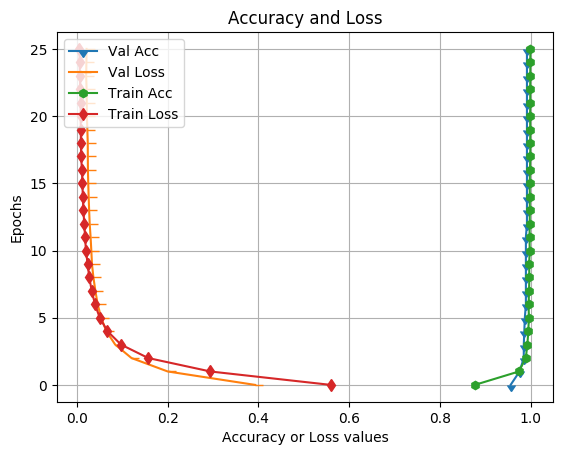

In [60]:
import matplotlib

plt.plot(history["val_acc"], 
         np.array(range(len(history["val_acc"]))), 
         marker=matplotlib.markers.CARETDOWNBASE,
         label="Val Acc")
plt.plot(history["val_loss"], 
         np.array(range(len(history["val_loss"]))), 
         marker=matplotlib.markers.TICKRIGHT,
         label="Val Loss")
plt.plot(history["acc"], 
         np.array(range(len(history["acc"]))), 
         marker='h',
         label="Train Acc")
plt.plot(history["loss"], 
         np.array(range(len(history["loss"]))),
         marker='d',
         label="Train Loss")
plt.title("Accuracy and Loss")
plt.xlabel("Accuracy or Loss values")
plt.ylabel("Epochs")
plt.legend(loc=2)
plt.grid()
plt.show()

In [0]:
tf.keras.backend.clear_session()